# 프로젝트: 고양이 수염 스티커 만들기

In [2]:
# 라이브러리 넣기
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np
import os

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


## Step 1. 스티커 구하기 or 만들기

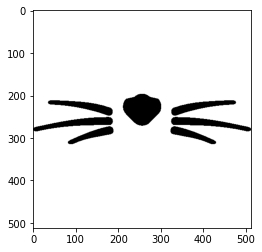

In [18]:
# 고양이 수염사진
cat_whisker = cv2.imread("data/cat-whiskers.png")
plt.imshow(cat_whisker)

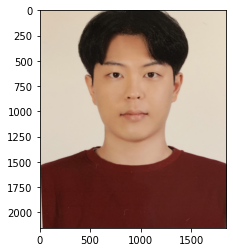

In [19]:
# 사진확인
me_bgr = cv2.imread("data/my_photo.png")
me = cv2.cvtColor(me_bgr, cv2.COLOR_BGR2RGB)
img_show = me_bgr.copy()  # 원본을 복사해서 사용
plt.imshow(me)

## Step 2. 얼굴 검출 & 랜드마크 검출하기
----------------------------------
dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아라

### 얼굴검출

In [20]:
# detector 선언
detector_hog = dlib.get_frontal_face_detector() 

In [21]:
# dlib은 rgb이미지를 입력으로 받기 때문에  cvColort()를 이용해서 변환
me_rgb = cv2.cvtColor(me_bgr, cv2.COLOR_BGR2RGB)  # 이미지 변환
dlib_rects = detector_hog(me_rgb, 1)   # (image, num of upsampling

rectangles[[(514, 426) (1313, 1224)]]


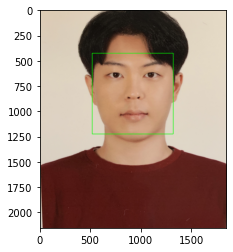

In [22]:
# 얼굴 잘 찾았는지 확인
print(dlib_rects)   

# 얼굴 박스 좌표 설정하기
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 4, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

>얼굴 잘 찾음

### 얼굴 랜드마크 

In [23]:
# 얼굴찾기 모델 임포트하기
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'

# 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)

In [24]:
# 랜드마크의 위치를 저장할 list 생성    
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_show, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
#     print("points", points.parts())
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  # point 타입으로 그냥 리스트로 변환되지 않는다. 그래서 람다로 뽑아서 리스트로 만들어줌
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
#     print("list_points : ", list_points)
    
    list_landmarks.append(list_points)
# list_landmarks에 랜드마크 리스트를 저장


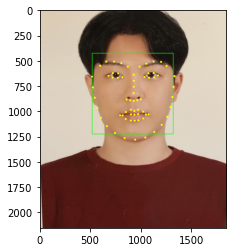

In [25]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:  # list_landmarks = 얼굴 박스 들, 현재는 하나만 존재
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1) # 이미지 파일, landmar 중에서 순서대로 포인터, 원 크기, 원 색, 정체 불명

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

> 얼굴의 형태도 잘 인식함

## Step 3. 스티커 적용 위치 확인하기
----------------------------
고양이 수염이 적용 될 위치를 landmark를 사용해서 계산  
코(30번)에 붙일 예정

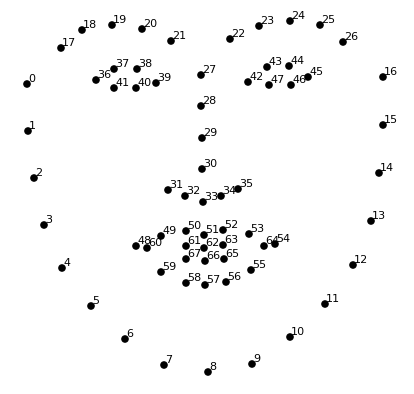

In [26]:
# 여러개의 값을 저장하는 방법이 필요하다
# 여러개의 얼굴을 인식하기 위해서 변수들을 리스트 형식으로 만들어 반복문을 돌린다.
x = []
y = []
w = []
h = []
idx = 0
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print ("코의 위치 : ",landmark[30]) # 코의 index는 30 입니다
    print("얼굴 box위치 : ",dlib_rect)
    print("얼굴 높이 : ",dlib_rect.height())
    x.append(landmark[30][0]) # 이미지에서 코 부위의 x값
    y.append(landmark[30][1]) # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    a = dlib_rect.width() 
    w.append(a)
    h.append(a)
    print ('(x,y) : (%d,%d)'%(x[idx],y[idx]))
    print ('(w,h) : (%d,%d)'%(w[idx],h[idx]))
    print("_"*30)
    idx +=1

코의 위치 :  (924, 819)
얼굴 box위치 :  [(514, 426) (1313, 1224)]
얼굴 높이 :  799
(x,y) : (924,819)
(w,h) : (800,800)
______________________________


In [27]:
img_sticker = []
for i, j in zip(w,h):
    img_sticker.append(cv2.resize(cat_whisker, (i,j))) 
# 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))

for i in range(len(img_sticker)):
    print(img_sticker[i].shape)

(800, 800, 3)


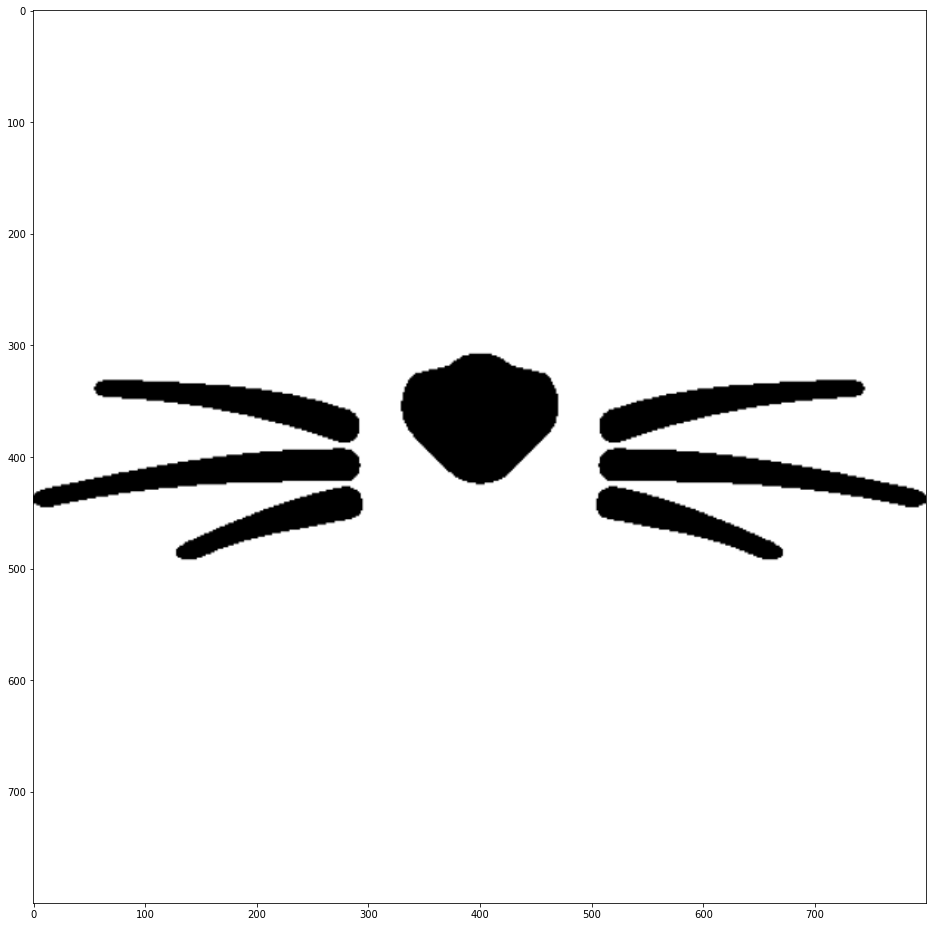

In [28]:
# 스티커 확인하기
plt.figure(figsize = (16,20))
for i, j in enumerate(img_sticker):
    img_sticker_cv = cv2.cvtColor(j, cv2.COLOR_BGR2RGB)
    plt.subplot(len(img_sticker),1,i+1)
    plt.imshow(img_sticker_cv)
plt.show()

In [29]:
# 변수에 여러값을 저장할 수 있어야한다.
refined_x = []
refined_y = []
# 스티커의 위치를 지정해준다.
for i, j, k, l in zip(x, y, w, h):
    refined_x.append(i-k//2)
    refined_y.append(j-l//2)
print(refined_x, refined_y)

[524] [419]


In [30]:
# 스티커의 값이 음수일때 음수인 부분을 잘라주는 코드
for i,j in enumerate(img_sticker):
    if refined_x[i] < 0: 
        j = j[:, -refined_x[i]:]
        refined_x[i] = 0
    # 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
    if refined_y[i] < 0:
        j = j[-refined_y[i]:, :] 
        refined_y[i] = 0
        
print (refined_x, refined_y)

[524] [419]


## Step 4. 스티커 적용하기
-------------------------------
1. np.where을 사용해 스티커를 적용
1. 스티커를 조금더 자연스럽게 보이게 하려면 어떻게 하면 좋을까요?
    - opencv의 cv2.addWeighted()를 참고

### 불투명도 조절해서 스티커 원하는 자리에 붙이기

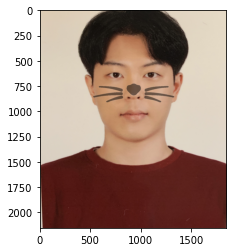

In [31]:
plt.cla()
for i,j in enumerate(img_sticker):
    sticker_area = me_bgr[refined_y[i]:refined_y[i] +j.shape[0], refined_x[i]:refined_x[i]+j.shape[1]]
    # 스티커랑 배경이랑 잘 스며들게 하는 코드
    me_bgr[refined_y[i]:refined_y[i] +img_sticker[i].shape[0], refined_x[i]:refined_x[i]+img_sticker[i].shape[1]] = \
        cv2.addWeighted(sticker_area, 0.5, np.where(j==255,sticker_area,j).astype(np.uint8), 0.5, 0)
    plt.imshow(cv2.cvtColor(me_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.

plt.show()

__함수로 만들기__

In [4]:
def catwhiskerssticker(photo):  
    # 스티커
    cat_whisker = cv2.imread("data/cat-whiskers.png")
    
    # 원본 사진 복사해서 사용
    img_show = photo.copy()
    # 모델 선언하기
    detector_hog = dlib.get_frontal_face_detector() 

    # 이미지 변환
    me_rgb = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)  # 이미지 변환
    dlib_rects = detector_hog(me_rgb, 1)   # (image, num of upsampling

    # 얼굴 박스 좌표 설정하기
    for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
        l = dlib_rect.left() # 왼쪽
        t = dlib_rect.top() # 위쪽
        r = dlib_rect.right() # 오른쪽
        b = dlib_rect.bottom() # 아래쪽

    # 얼굴형태 인삭 모델 임포트하기
    model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
        # 저장한 landmark 모델의 주소를 model_path 변수에 저장
    landmark_predictor = dlib.shape_predictor(model_path)

    # 랜드마크의 위치를 저장할 list 생성    
    list_landmarks = []

    # 얼굴 영역 박스 마다 face landmark를 찾아냅니다
    # face landmark 좌표를 저장해둡니다
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_show, dlib_rect)
            # 모든 landmark의 위치정보를 points 변수에 저장
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))  # point 타입으로 그냥 리스트로 변환되지 않는다. 그래서 람다로 뽑아서 리스트로 만들어줌
            # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장

        list_landmarks.append(list_points)

    # 여러개의 값을 저장하는 방법이 필요하다
    # 여러개의 얼굴을 인식하기 위해서 변수들을 리스트 형식으로 만들어 반복문을 돌린다.
    x = []
    y = []
    w = []
    h = []
    idx = 0
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
        x.append(landmark[30][0]) # 이미지에서 코 부위의 x값
        y.append(landmark[30][1]) # 이미지에서 코 부위의 y값 
        a = dlib_rect.width() 
        w.append(a)
        h.append(a)

    # 스티커 크기 조정하기
    img_sticker = []
    for i, j in zip(w,h):
        img_sticker.append(cv2.resize(cat_whisker, (i,j))) 


    # 여기도 중복값을 처리할 수 있어야 한다.
    refined_x = []
    refined_y = []
    for i, j, k, l in zip(x, y, w, h):
        refined_x.append(i-k//2)
        refined_y.append(j-l//2)

    # 스티커의 좌표가 음수일때 처리해야함
    for i,j in enumerate(img_sticker):
        print(i, j.shape)
        if refined_x[i] < 0: 
            j = j[:, -refined_x[i]:]
            refined_x[i] = 0
        # 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
        if refined_y[i] < 0:
            j = j[-refined_y[i]:, :] 
            refined_y[i] = 0

    # 스티커 붙이기 
    for i,j in enumerate(img_sticker):
        sticker_area = me_bgr[refined_y[i]:refined_y[i] +j.shape[0], refined_x[i]:refined_x[i]+j.shape[1]]
        # 스티커랑 배경이랑 잘 스며들게 하는 코드
        me_bgr[refined_y[i]:refined_y[i] +img_sticker[i].shape[0], refined_x[i]:refined_x[i]+img_sticker[i].shape[1]] = \
            cv2.addWeighted(sticker_area, 0.5, np.where(j==255,sticker_area,j).astype(np.uint8), 0.5, 0)
        plt.imshow(cv2.cvtColor(me_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.




    return plt.show()

0 (800, 800, 3)


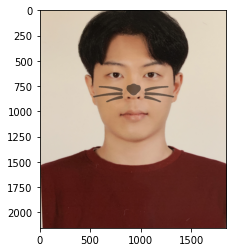

In [184]:
me_bgr = cv2.imread("data/my_photo.png")
catwhiskerssticker(me_bgr)

0 (322, 322, 3)


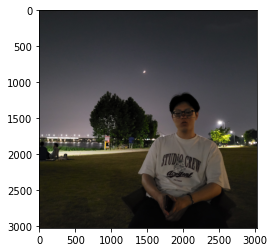

In [6]:
me_bgr = cv2.imread("data/어두운배경.jpg")
catwhiskerssticker(me_bgr)
# 잘 안 보이지만 고양이 수염이 붙어있다.

0 (224, 224, 3)


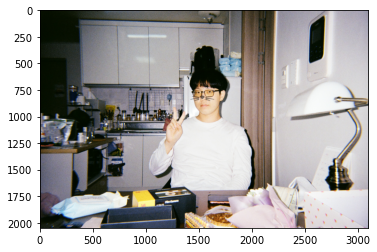

In [7]:
# 필름으로 인화된 사진이다.
me_bgr = cv2.imread("data/필름사진.jpg")
catwhiskerssticker(me_bgr)

0 (666, 666, 3)
1 (1151, 1151, 3)


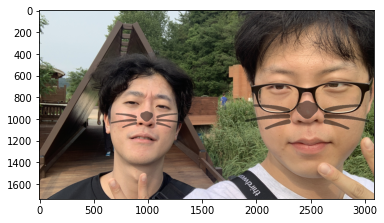

In [190]:
# 여러명이 들어간 사진
me_bgr = cv2.imread("data/p3.jpg")
catwhiskerssticker(me_bgr)

0 (322, 322, 3)
1 (268, 268, 3)
2 (800, 800, 3)


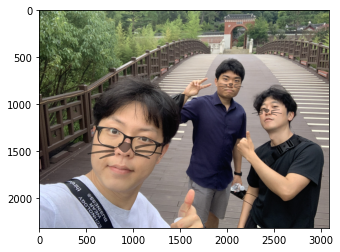

In [191]:
me_bgr = cv2.imread("data/p4.jpg")
catwhiskerssticker(me_bgr)

> 고개 각도가 틀어지거나 하면 약간 사진이 같이 틀어지지 않아서 어색함

## Step 5. 문제점 찾아보기
-----------------------------
1. 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해보세요
1. 문제점이 무엇인지 최대하 자세하게 기록해 보세요.

### 문제점
1. 얼굴 각도가 틀어졌을때 자연스럽게 반영하지 못한다. 
1. 여러 명이 사진에 등장 했을 때, 때때로 인식하지 못하는 사람이 생긴다. 원인을 아직 찾지 못했다. 
1. 여러명이 되었을때, 이상하게 스티커의 위치를 제대로 잡지 못하는 경우가 생긴다. 그런경우도 있고 아닌경우도 있어서 아직 원인을 파악하지 못했다. 

### 회고
1. 이번 익스는 구현을 하는 것은 전반적으로 어렵지 않은 편이었다. 
1. 하면서 어려웠던 점은 두 가지 였다. 
    1. 정확한 위치에 스티커 붙이기
    1. 여러명 일때도 적용시키는것 
1. 좀 더 해보고 싶은것이 많은 파트지만 시간이 없어서 더 실험해 보지 못한것이 아쉽다. 
1. 추후에 시간이 나면 얼굴 각도에 따라 자연스럽게 회전하는 스티커도 만들어 보고 싶다. 